In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# PCA - Dimesnsionality-Reduction Technique


 PCA is unsupervised algorithm which helps us to reduce the number of dimention or number of features of some other dimentions.
 
 As in ML whenever no of dimentions increses it will impact on accuracy

 Ex . if try to convert 2 DIM Element to 1 DIM 

 - We need to plot it in single best vector space
 - we try to project all the points on single vector

Goal of PCA is to find the linear projection that gives you the "best" representation of your data for a given dimensionality. It defines "best" by the representation with the minimal squared reconstruction error.

When looking at PCA from 2 dimensions to 1 dimension, as you do there, you are not actually trying to find the line that best predicts y from x. Rather, you're trying to find the combination of y and x such that the new, combined value "best" represents all your initial 2-D points.

Essentially, the reason PCA considers the perpendicular distance is because it doesn't actually try to model yy as a function of xx.
 


In [0]:
# PCA is unsupervised algorithm which helps us to reduce the number of dimention or number of features of some other dimentions
# As in ML whenever no of dimentions increses it will impact on accuracy

In [0]:
# Ex . if try to convert 2 DIM Element to 1 DIM 

# - We need to plot it in single best vector space
# - we try to project all the points on single vector


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
cancer = load_breast_cancer()

In [7]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(cancer['DESCR'])
# attributes are features of our cancer dataset
# target output is either - Malignant or Benign

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
# dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# PCA Visualization


In [0]:
# here total no of dimentions are 30 and we are going to convert it in 2 dimentions

# - first to achive this we need to de standard normalization 
    # - suppose all the features variable we consider as random variables and we follow gaussian or normal distribution 
    #  - so features will go through normal distribution ( Xi - U ) / SD where we apply this formula on all the features, 
    #    it will convert it in standard normal distribution where U=0 and SD=1, in sklearn this we called as STANDARD SCALAR
    #  STANDARD SCALAR - need to rescale the value in same unit.   
    
          #Xi - each value
          #U  - mean of feature
          #SD - standard daviation
          
          

In [0]:
from sklearn.preprocessing import StandardScaler

In [19]:
scalar = StandardScaler()
scalar.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_data = scalar.transform(df)

 . Instantiate a PCA object, 
 
 . find the principal components using the fit method, 
 
 . then apply the rotation and dimensionality reduction by 
   calling transform().

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)# We can also specify how many components we want to keep when creating the PCA object.

In [28]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
# now we can transform the data in 2 principle components

In [0]:
x_pca = pca.transform(scaled_data)

In [35]:
scaled_data.shape # before

(569, 30)

In [39]:
x_pca.shape # after

(569, 2)

In [40]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

finally we converted 30 dimentions/features into 2 

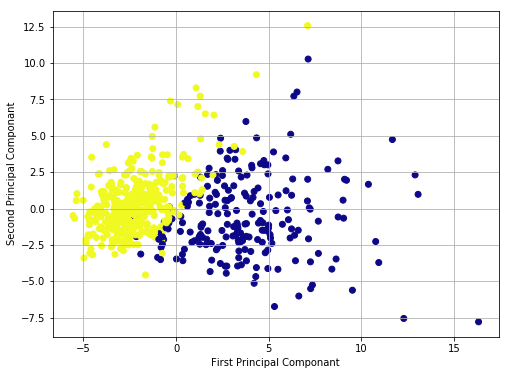

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Componant')
plt.ylabel('Second Principal Componant')
plt.grid()

Now, we can apply any ML algorithm for further analysis with this scaled data , 

Now we know, Our Independent variable is 'x_pca' and output feature is cancer['target'] , then  tain test split ....then apply any algo as per requirement

PCA is a part of 'Data Preprocessing'

# Interpreting the components


 - It is difficult to interprete the components.

 - The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA   object.

In [49]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. 

In [0]:
componants_df = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

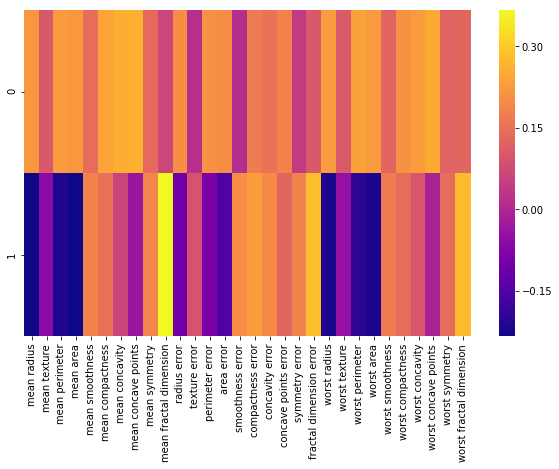

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(componants_df,cmap='plasma')

this heat map shows correlation between the various feature and the principal component.